In [1]:
## 네이버 뉴스 크롤링

from selenium import webdriver
import time
import re
import csv

keywords = ['전동킥보드', '킥라니', '전킥', '전동 킥보드', '전동 스쿠터', '전동스쿠터']
driver = webdriver.Chrome('C:/Temp/chromedriver')

for keyword in keywords:

    newsname = []
    pageNum = 1
    
    url = 'https://search.naver.com/search.naver?&where=news&query=' +str(keyword)+ '&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=53&start=1&refresh_start=0'
    driver.get(url)
    time.sleep(2)

    while True:
        newsnode = driver.find_elements_by_css_selector('.news_tit')

        for i in newsnode:
            newsname.append(i.text)
        
        next = driver.find_element_by_css_selector('.btn_next')
        pageNum += 1
    
        if pageNum > 100 :
            break
        else :
            next.click()
            time.sleep(3)
    
    with open(str(keyword) + '.csv', 'w', newline='', encoding='UTF-8') as f:
        f.write('newsname\n')
        for i in range(len(newsname)):
            f.write(newsname[i]+'\n')

KeyboardInterrupt: 

In [2]:
## 워드클라우드

from selenium import webdriver
import time
import re
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

f = open('전동킥보드.csv', 'r', encoding='UTF-8')
lines = f.readlines()

# title data 합치기
message = ''
for line in lines:
    message = message + re.sub('[^\w]', ' ', line) +''
#message = re.sub('자전거', '', message)
#message = re.sub('공공', '', message)

# 명사 추출
nlp = Okt()
message_N = nlp.nouns(message)

# 단어 빈도 확인
count = Counter(message_N)
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
#         print("%s : %d" % (tag, counts))
        print(tag,':',counts)

보드 : 998
전동 : 249
헬멧 : 230
범칙 : 225
면허 : 182
무면허 : 179
강화 : 155
운전 : 137
단속 : 126
안전 : 101
오늘 : 87
필수 : 87
포토 : 84
공유 : 72
규제 : 70
첫날 : 67
이용 : 59
내일 : 58
안전모 : 57
규정 : 53
가능 : 47
벌금 : 38
착용 : 37
미착 : 34
인도 : 33
개정 : 33
시행 : 33
개인 : 33
도로교통법 : 31
화재 : 31
충전 : 31
관련 : 28
캠페인 : 28
장치 : 27
위반 : 26
교통 : 25
경찰 : 25
부과 : 25
의무 : 25
실효 : 23
이동 : 23
주행 : 22
이용자 : 21
처벌 : 21
집중 : 19
운행 : 19
도로 : 18
여전 : 18
탑승 : 18
뉴스 : 17
이용문 : 17
면허증 : 16
주의 : 16
전시 : 15
시민 : 14
금지 : 14
부터 : 14
정차 : 14
여수시 : 14
업계 : 13
사고 : 13
아파트 : 13
확산 : 13
시작 : 13
부산 : 13
현장 : 12
이상 : 12
배터리 : 12
과태료 : 12
제주 : 12
타고 : 11
소지 : 11
운전면허 : 11
대피 : 11
홍보 : 11
지쿠 : 11
업무 : 11
협약 : 11


In [7]:
word_count

{'보드': 998,
 '전동': 249,
 '헬멧': 230,
 '범칙': 225,
 '면허': 182,
 '무면허': 179,
 '강화': 155,
 '운전': 137,
 '단속': 126,
 '안전': 101,
 '오늘': 87,
 '필수': 87,
 '포토': 84,
 '공유': 72,
 '규제': 70,
 '첫날': 67,
 '이용': 59,
 '내일': 58,
 '안전모': 57,
 '규정': 53,
 '가능': 47,
 '벌금': 38,
 '착용': 37,
 '미착': 34,
 '인도': 33,
 '개정': 33,
 '시행': 33,
 '개인': 33,
 '도로교통법': 31,
 '화재': 31,
 '충전': 31,
 '관련': 28,
 '캠페인': 28,
 '장치': 27,
 '위반': 26,
 '교통': 25,
 '경찰': 25,
 '부과': 25,
 '의무': 25,
 '실효': 23,
 '이동': 23,
 '주행': 22,
 '이용자': 21,
 '처벌': 21,
 '집중': 19,
 '운행': 19,
 '도로': 18,
 '여전': 18,
 '탑승': 18,
 '뉴스': 17,
 '이용문': 17,
 '면허증': 16,
 '주의': 16,
 '전시': 15,
 '시민': 14,
 '금지': 14,
 '부터': 14,
 '정차': 14,
 '여수시': 14,
 '업계': 13,
 '사고': 13,
 '아파트': 13,
 '확산': 13,
 '시작': 13,
 '부산': 13,
 '현장': 12,
 '이상': 12,
 '배터리': 12,
 '과태료': 12,
 '제주': 12,
 '타고': 11,
 '소지': 11,
 '운전면허': 11,
 '대피': 11,
 '홍보': 11,
 '지쿠': 11,
 '업무': 11,
 '협약': 11}

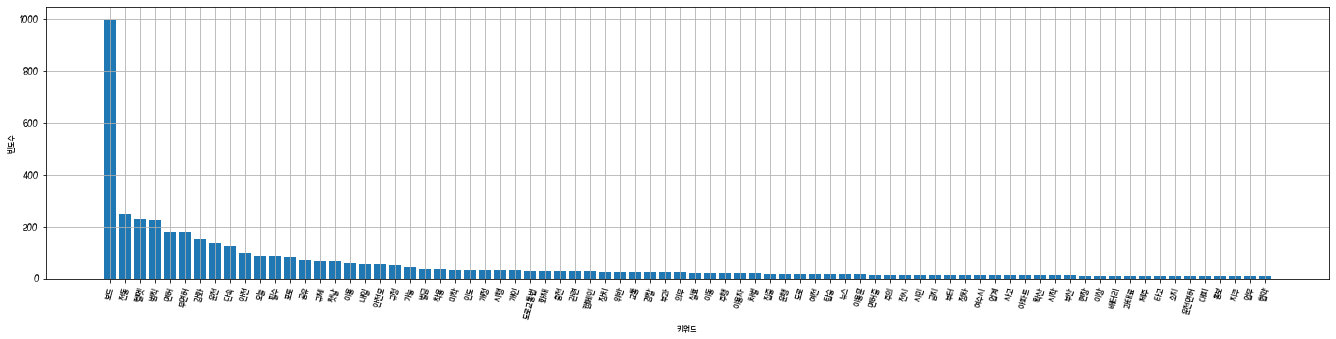

In [3]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(23,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

In [8]:
message

'newsname 전동킥보드 헬멧 안쓰면 범칙금 2만원 현장에선  안전모 없이 횡단보도  쌩쌩  전동킥보드 단속 첫날 오늘부터  무면허 전동킥보드 운전  범칙금 헬멧 필수 헬멧 안쓰고  인도로 쌩쌩  전동킥보드 탄 21명중 규정 준수  0  전동 킥보드 단속 첫날  헬멧 안썼네요  전동킥보드  면허 안전모  없이 타다 적발되면 범칙금 무면허 전동 킥보드 단속 첫날 여전히  노 헬멧 으로 쌩쌩  안전모 착용 몰랐어요  전동 킥보드 규정 강화 첫날  헬멧 없이 전동킥보드 타면 안된다고   법 개정 첫날 시민들 혼란 도로교통법 개정 첫날 전동 킥보드 타던 20대 승용차 충돌 전동킥보드  이젠 무면허 운전 안된다 범칙금 10만원 오늘부터  무면허 전동킥보드 운전  범칙금 10만 원 전동 킥보드 단속 첫날  헬멧 벗고 킥보드  속출  친절한 경제   내일부터 전동 킥보드 무면허 안 돼요  오늘부터 전동킥보드 이렇게 타면 단속 전동킥보드 몰던 20대  단속 첫날 승용차와  쾅  오늘부터 전동킥보드 탈 때  면허 헬멧  필수 인도 주행도 금지 무면허 전동 킥보드 등 단속  헬멧 착용 필수  르포  인도는 안돼  찻길선 빵빵  전동킥보드   도로 위 민폐  오늘부터  전동킥보드 규제 강화  도로교통공단  교육자료 개발 배포  면허증 안전모 필수  전동킥보드  딱  걸린 현장들  전동 킥보드 안 타고 말지  업계는  울상   팩트맨 면허 없이 못 탄다 전동 킥보드 Q A 전동킥보드 단속 첫날  안전모에 속도 제한  규제 과해요  무면허 전동 킥보드 범칙금 10만 원 음주 라이딩 10만 원  킥보드 헬멧 쓰라고   따릉이  탈게요  헬멧   면허증 전동 킥보드 단속 첫날  곳곳 적발 속출  헬멧 안 쓰셨네요  전동킥보드 단속 첫날  위반  수두룩  전동킥보드 범칙금 첫날  헬멧 착용  두고는 실효성 의문 전동킥보드 규정 강화  경찰  한 달 집중 계도기간 운영 오늘부터 전동킥보드 탈때 면허 필수 오늘 13일 부터 면허 없으면 킥보드 못 타는데  거리는 여전히  무법천지   포토

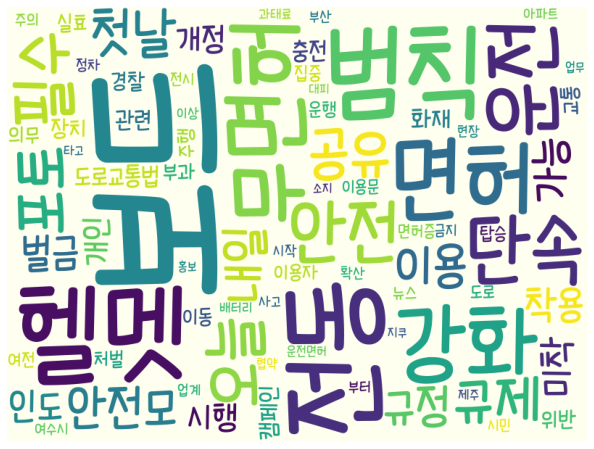

In [4]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 워드클라우드 png저장
# wc.to_file('output/new_wordcloud.png')

In [5]:
import tweepy

api_key = "RvnZeIl8ra88reu8fm23m0bST"
api_secret = "wTRylK94GK2KmhZUnqXonDaIszwAsS6VPvpSsIo6EX5GQLtzQo"
access_token = "959614462004117506-dkWyZaO8Bz3ZXh73rspWfc1sQz0EnDU"
access_token_secret = "rxDWfg7uz1yXMTDwijz0x90yWhDAnmOM15R6IgC8kmtTe"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

keyword = '전동 킥보드'   
search = []   

cnt = 1
while(cnt <= 10):   
    tweets = api.search(q=keyword, count=100)
    for tweet in tweets :
        search.append(tweet)
    cnt += 1

data = {}   
i = 1   
print('[' + keyword + '에 대한 트윗 글 ]')    
for tweet in search:
    data['text'] = tweet.text   
    print(i, " : ", data)   
    i += 1

[전동 킥보드에 대한 트윗 글 ]
1  :  {'text': 'RT @EggMari0: 전동킥보드 단속 첫날\n\n[10만원] https://t.co/Rqfh0lCzhG'}
2  :  {'text': 'RT @EggMari0: 전동킥보드 단속 첫날\n\n[10만원] https://t.co/Rqfh0lCzhG'}
3  :  {'text': 'RT @EggMari0: 전동킥보드 단속 첫날\n\n[10만원] https://t.co/Rqfh0lCzhG'}
4  :  {'text': 'RT @redespair: 아까 홍대에서 누가 헬멧 안쓰고 전동킥보드 타고 다니다가 경찰한테 걸림 + 옆에 있던 ytn기자한테 잡혀서 인터뷰까지하더라 ㅋㅋ'}
5  :  {'text': 'RT @redespair: 아까 홍대에서 누가 헬멧 안쓰고 전동킥보드 타고 다니다가 경찰한테 걸림 + 옆에 있던 ytn기자한테 잡혀서 인터뷰까지하더라 ㅋㅋ'}
6  :  {'text': 'RT @EggMari0: 전동킥보드 단속 첫날\n\n[10만원] https://t.co/Rqfh0lCzhG'}
7  :  {'text': 'RT @EggMari0: 전동킥보드 단속 첫날\n\n[10만원] https://t.co/Rqfh0lCzhG'}
8  :  {'text': 'RT @redespair: 아까 홍대에서 누가 헬멧 안쓰고 전동킥보드 타고 다니다가 경찰한테 걸림 + 옆에 있던 ytn기자한테 잡혀서 인터뷰까지하더라 ㅋㅋ'}
9  :  {'text': 'RT @EggMari0: 전동킥보드 단속 첫날\n\n[10만원] https://t.co/Rqfh0lCzhG'}
10  :  {'text': 'RT @redespair: 아까 홍대에서 누가 헬멧 안쓰고 전동킥보드 타고 다니다가 경찰한테 걸림 + 옆에 있던 ytn기자한테 잡혀서 인터뷰까지하더라 ㅋㅋ'}
11  :  {'text': 'RT @redespair: 아까 홍대에서 누가 헬멧 안쓰고 전동킥보드 타고 다니다가 경찰한테 걸림 + 옆에 있던 ytn기자한테 잡혀서 

In [6]:
data

{'text': "RT @JTBC_news: 오늘부터 전동킥보드 '면허·헬멧' 필수…인도 주행도 금지 https://t.co/6FGzW5zCy8"}

In [ ]:
## 워드클라우드

from selenium import webdriver
import time
import re
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

f = open('전동킥보드.csv', 'r', encoding='UTF-8')
lines = f.readlines()

# title data 합치기
message = ''
for line in lines:
    message = message + re.sub('[^\w]', ' ', line) +''
#message = re.sub('자전거', '', message)
#message = re.sub('공공', '', message)

# 명사 추출
nlp = Okt()
message_N = nlp.nouns(message)

# 단어 빈도 확인
count = Counter(message_N)
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
#         print("%s : %d" % (tag, counts))
        print(tag,':',counts)